## 신경망 모델 훈련 
- EarlyStopping  
- Dropout  
- CheckPoint  

###  EarlyStopping

- EarlyStopping(monitor = 'val_loss',   
                  - min_delta = 0,   
                  - patience = 0,   
                  - mode = 'auto', 
                  - restore_best_weights=True)  

- monitor : 학습 조기종료를 위해 관찰하는 항목  
    - val_loss 또는 val_accuracy 주로 사용 (default : val_loss)  
- min_delta : 개선되고 있다고 판단하기 위한 최소 변화량  
    - 만약 변화량이 min_delta 보다 적은 경우에는 개선이 없다고 판단 (default = 0)  
- patience : 개선이 안되더라도 바로 종료시키지 않고,   
    - 개선을 위해 몇 번의 에포크를 더 진행할지 설정  (default = 0)  
- mode : 관찰항목에 대해 개선이 없다고 판단하기 위한 기준 설정  
    - monitor에서 설정한 항목이   
      - val_loss 이면 값이 감소되지 않을 때 종료하여야 하므로 min  설정,   
      - val_accuracy 이면 max 설정 (default = auto)  
        - auto : monitor에 설정된 이름에 따라 자동 지정 
        - min : 관찰값이 감소하는 것을 멈출 때, 학습 종료 
        - max: 관찰값이 증가하는 것을 멈출 때, 학습 종료 
- restore_best_weights 
  - 최상의 가중치를 복원할지 여부 결정 (디폴트 False)  
  - True로 설정하면 학습 중 최상의 검증 손실을 가진 가중치 복원  
--- 
- early_stopping_callback = EarlyStopping(patience=2, restore_best_weights=True)  
- fit() 할 때 
  - callbacks=[early_stopping_callback]  파라미터 설정   
- 콜백 함수 : 특정 이벤트 발생 시 호출되는 함수  
- fit() 훈련 과정 중간에  EarlyStopping() 함수 호출  

### 사용 데이터 : mnist 데이터셋
- 정규화만 수행하고, 
- 레이블 인코딩 수행하지 않고 정수값 그대로 사용   
- loss='sparse_categorical_crossentropy'    

### (1) 데이터 준비 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [9]:
import numpy as np

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 데이터 로드 
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
# 차원 변환 및 정규화
# X_train : (60000, 28, 28)  -> (60000, 28*28) == (60000, 784)
X_train2 = X_train.reshape(60000, 28*28)
X_train2 = X_train2 / 255

# X_test : (10000, 28, 28) -> (10000, 784)
X_test2 = X_test.reshape(10000, 28*28)
X_test2 = X_test2 / 255

### (3) 모델링 

#### 모델링 순서  
(1) 모델 설정   
(2) 모델 컴파일   
(3) 모델 학습(실행)   
(4) 모델 평가(결과 출력)  

### Eary Stopping과 Dropout 적용하지 않은 경우

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

tf.random.set_seed(3)

# (1) 모델 설정
# 2개의 층으로 구성된 모델 
# 첫 번째 층 : 입력 : 28*28=784, 출력 : 512
# 두 번째 층 : (입력 512), 출력 : 10

# 활성화 함수 : activation= 'softmax' : 다중 분류 
# 출력층 출력값 수 : 10
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='softmax'))

# (2) 컴파일
# 다중분류 : loss='categorical_crossentropy'
# 최적화 : optimizer='rmsprop'
# 평가방법 :  metrics='accuracy'
# 레이블 인코딩 안하고 정수 그대로 쓸거니까 sparse_categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='rmsprop', metrics=['accuracy'])

# (3) 모델 학습 (실행)
# epochs=100
# batch_size=128
epochs = 100
batch_size = 128

history = model.fit(X_train2, y_train, 
                    epochs=epochs, batch_size=batch_size,
                    validation_data=(X_test2, y_test))
# 학습 과정 결과를 history 객체에 저장
# validation_data 지정해야 함

# (4) 모델 평가 (결과 출력)
loss, accuracy = model.evaluate(X_test2, y_test)

print(f'정확도: {accuracy:.4f}, 손실: {loss:.4f}')


Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2576 - accuracy: 0.9262 - val_loss: 0.1222 - val_accuracy: 0.9632
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1043 - accuracy: 0.9688 - val_loss: 0.0912 - val_accuracy: 0.9737
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0694 - accuracy: 0.9791 - val_loss: 0.0919 - val_accuracy: 0.9716
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0510 - accuracy: 0.9846 - val_loss: 0.0751 - val_accuracy: 0.9767
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0384 - accuracy: 0.9888 - val_loss: 0.0752 - val_accuracy: 0.9765
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0292 - accuracy: 0.9914 - val_loss: 0.0713 - val_accuracy: 0.9782
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0226 - accuracy: 0.9931 - val_loss: 0.0678 - val_accuracy: 0.9811

Epoch 57/100
469/469 [==============================] - 3s 7ms/step - loss: 9.8805e-09 - accuracy: 1.0000 - val_loss: 0.1475 - val_accuracy: 0.9834
Epoch 58/100
469/469 [==============================] - 3s 6ms/step - loss: 9.5427e-09 - accuracy: 1.0000 - val_loss: 0.1477 - val_accuracy: 0.9836
Epoch 59/100
469/469 [==============================] - 3s 6ms/step - loss: 9.2626e-09 - accuracy: 1.0000 - val_loss: 0.1478 - val_accuracy: 0.9836
Epoch 60/100
469/469 [==============================] - 4s 8ms/step - loss: 8.8950e-09 - accuracy: 1.0000 - val_loss: 0.1481 - val_accuracy: 0.9836
Epoch 61/100
469/469 [==============================] - 3s 6ms/step - loss: 8.6288e-09 - accuracy: 1.0000 - val_loss: 0.1485 - val_accuracy: 0.9832
Epoch 62/100
469/469 [==============================] - 3s 6ms/step - loss: 8.4579e-09 - accuracy: 1.0000 - val_loss: 0.1490 - val_accuracy: 0.9833
Epoch 63/100
469/469 [==============================] - 3s 7ms/step - loss: 8.1778e-09 - accuracy: 1.0000 - val_

In [ ]:
# accuracy와 loss 확인
plt. figure(figsize=(18, 6))

# 정확도
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy')
plt.legend()

# 손실률
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('loss')
plt.legend()

plt.show()

In [ ]:
########################################################################

### Earyl Stopping 적용

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from keras.callbacks import EarlyStopping

tf.random.set_seed(3)

# (1) 모델 설정
# 2개의 층으로 구성된 모델 
# 첫 번째 층 : 입력 : 28*28=784, 출력 : 512
# 두 번째 층 : (입력 512), 출력 : 10
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='softmax'))

# (2) 컴파일
# 레이블 인코딩 안하고 정수 그대로 쓸거니까 sparse_categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='rmsprop', metrics=['accuracy'])


# Early Stopping적용
# patience : 개선이 안되더라도 바로 종료시키지 않고, 2개 더 에포크 진행
early_stopping_callback = EarlyStopping(patience=2, restore_best_weights=True)

# (3) 모델 학습 (실행)
epochs = 100
batch_size = 128

history = model.fit(X_train2, y_train, 
                    epochs=epochs, batch_size=batch_size,
                    validation_data=(X_test2, y_test),
                    callbacks=[early_stopping_callback])


# (4) 모델 평가 (결과 출력)
loss, accuracy = model.evaluate(X_test2, y_test)

print(f'정확도: {accuracy:.4f}, 손실: {loss:.4f}')


Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2561 - accuracy: 0.9269 - val_loss: 0.1209 - val_accuracy: 0.9633
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1029 - accuracy: 0.9698 - val_loss: 0.0932 - val_accuracy: 0.9719
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0673 - accuracy: 0.9795 - val_loss: 0.0899 - val_accuracy: 0.9717
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0490 - accuracy: 0.9853 - val_loss: 0.0708 - val_accuracy: 0.9769
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0369 - accuracy: 0.9895 - val_loss: 0.0669 - val_accuracy: 0.9813
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0283 - accuracy: 0.9913 - val_loss: 0.0664 - val_accuracy: 0.9807
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0218 - accuracy: 0.9934 - val_loss: 0.0688 - val_accuracy: 0.9809

<Figure size 1800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'accuracy')

<Axes: >

Text(0.5, 1.0, 'loss')

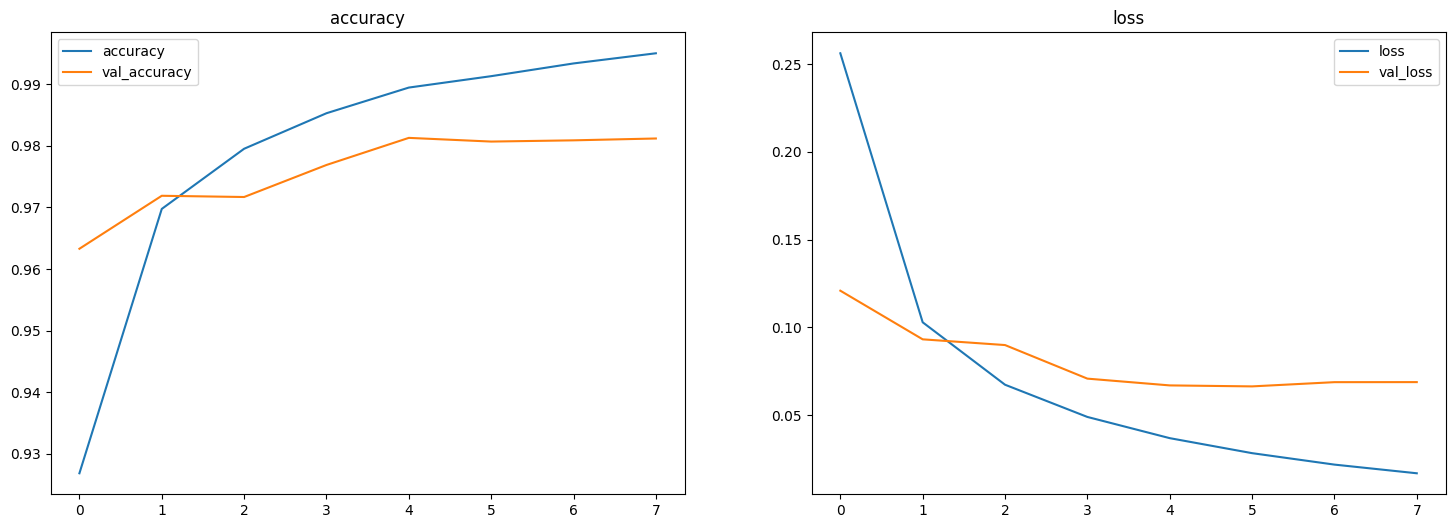

In [12]:
# accuracy와 loss 확인
plt. figure(figsize=(18, 6))

# 정확도
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy')
plt.legend()

# 손실률
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('loss')
plt.legend()

plt.show()

In [ ]:
###########################################################################

### Drop Out 적용 

## 드롭아웃

- 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 끔(출력을 0으로 만듬)으로써 
- 일반화 시켜 과대적합을 막는 방법
- 샘플들마다 다른(랜덤하게) 뉴런을 끔
- 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있으므로 모든 입력에 주의를 기울이게 됨
- keras.layers.Dropout(뉴런 비율:0-1)
  - 규제를 위한 층 : 파라미터인 뉴런비율은 0.3 기본값
  
- 모델의 훈련이 끝나고 예측 평가를 진행할 때는 drop-out을 적용하지 말아야 함
    - 그래야 훈련된 모든 뉴런을 이용해 예측을 진행 할 수 있음
    - 케라스는 예측 평가시(evaluation)에서 drop-out을 자동으로 적용시키지 않는다
        - evaluation은 predict에 해당됨(test 데이터로 사용) 

### Dropout만 적용한 경우 

In [13]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
from keras.callbacks import EarlyStopping

tf.random.set_seed(3)

# (1) 모델 설정
# 2개의 층으로 구성된 모델 
# 첫 번째 층 : 입력 : 28*28=784, 출력 : 512
# 두 번째 층 : (입력 512), 출력 : 10

# 활성화 함수 : activation= 'softmax' : 다중 분류 
# 출력층 출력값 수 : 10
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dropout((0.3))) # 드롭아웃
model.add(Dense(10, activation='softmax'))

# (2) 컴파일

# 레이블 인코딩 안하고 정수 그대로 쓸거니까 sparse_categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='rmsprop', metrics=['accuracy'])

# (3) 모델 학습 (실행)
epochs = 100
batch_size = 128

history = model.fit(X_train2, y_train, 
                    epochs=epochs, batch_size=batch_size,
                    validation_data=(X_test2, y_test))


# (4) 모델 평가 (결과 출력)
loss, accuracy = model.evaluate(X_test2, y_test)

print(f'정확도: {accuracy:.4f}, 손실: {loss:.4f}')


Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2857 - accuracy: 0.9165 - val_loss: 0.1283 - val_accuracy: 0.9624
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1248 - accuracy: 0.9624 - val_loss: 0.0934 - val_accuracy: 0.9717
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0890 - accuracy: 0.9733 - val_loss: 0.0910 - val_accuracy: 0.9728
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0723 - accuracy: 0.9781 - val_loss: 0.0704 - val_accuracy: 0.9782
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0613 - accuracy: 0.9811 - val_loss: 0.0712 - val_accuracy: 0.9798
Epoch 6/100
469/469 [==============================] - 3s 5ms/step - loss: 0.0523 - accuracy: 0.9840 - val_loss: 0.0670 - val_accuracy: 0.9801
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0459 - accuracy: 0.9858 - val_loss: 0.0677 - val_accuracy: 0.9813

Epoch 58/100
469/469 [==============================] - 3s 5ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.1148 - val_accuracy: 0.9850
Epoch 59/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.1198 - val_accuracy: 0.9843
Epoch 60/100
469/469 [==============================] - 3s 5ms/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.1197 - val_accuracy: 0.9848
Epoch 61/100
469/469 [==============================] - 3s 5ms/step - loss: 0.0049 - accuracy: 0.9984 - val_loss: 0.1189 - val_accuracy: 0.9848
Epoch 62/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.1189 - val_accuracy: 0.9841
Epoch 63/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.1119 - val_accuracy: 0.9850
Epoch 64/100
469/469 [==============================] - 3s 5ms/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.1147 - val_accuracy:

<Figure size 1800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'accuracy')

<Axes: >

Text(0.5, 1.0, 'loss')

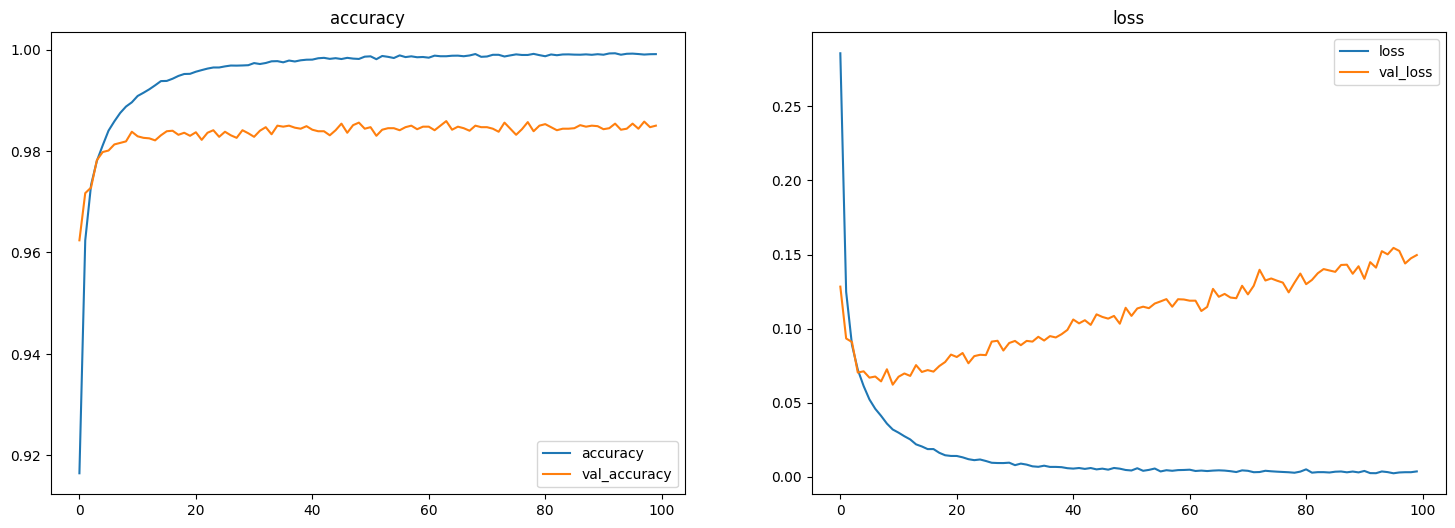

In [14]:
# accuracy와 loss 확인
plt. figure(figsize=(18, 6))

# 정확도
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy')
plt.legend()

# 손실률
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('loss')
plt.legend()

plt.show()

### Dropout + Early Stopping 둘 다 적용한 경우

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
from keras.callbacks import EarlyStopping

tf.random.set_seed(3)

# (1) 모델 설정
# 2개의 층으로 구성된 모델 
# 첫 번째 층 : 입력 : 28*28=784, 출력 : 512
# 두 번째 층 : (입력 512), 출력 : 10
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dropout((0.3))) # 드롭아웃
model.add(Dense(10, activation='softmax'))

# (2) 컴파일
# 레이블 인코딩 안하고 정수 그대로 쓸거니까 sparse_categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='rmsprop', metrics=['accuracy'])


# Early Stopping적용
# patience : 개선이 안되더라도 바로 종료시키지 않고, 2개 더 에포크 진행
early_stopping_callback = EarlyStopping(patience=2, restore_best_weights=True)

# (3) 모델 학습 (실행)
epochs = 100
batch_size = 128

history = model.fit(X_train2, y_train, 
                    epochs=epochs, batch_size=batch_size,
                    validation_data=(X_test2, y_test),
                    callbacks=[early_stopping_callback])


# (4) 모델 평가 (결과 출력)
loss, accuracy = model.evaluate(X_test2, y_test)

print(f'정확도: {accuracy:.4f}, 손실: {loss:.4f}')


Epoch 1/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2852 - accuracy: 0.9173 - val_loss: 0.1361 - val_accuracy: 0.9587
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1259 - accuracy: 0.9621 - val_loss: 0.0953 - val_accuracy: 0.9700
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0913 - accuracy: 0.9723 - val_loss: 0.0957 - val_accuracy: 0.9711
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0739 - accuracy: 0.9778 - val_loss: 0.0743 - val_accuracy: 0.9766
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0605 - accuracy: 0.9815 - val_loss: 0.0722 - val_accuracy: 0.9785
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0533 - accuracy: 0.9843 - val_loss: 0.0705 - val_accuracy: 0.9791
Epoch 7/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0463 - accuracy: 0.9855 - val_loss: 0.0670 - val_accuracy: 0.980

<Figure size 1800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'accuracy')

<Axes: >

Text(0.5, 1.0, 'loss')

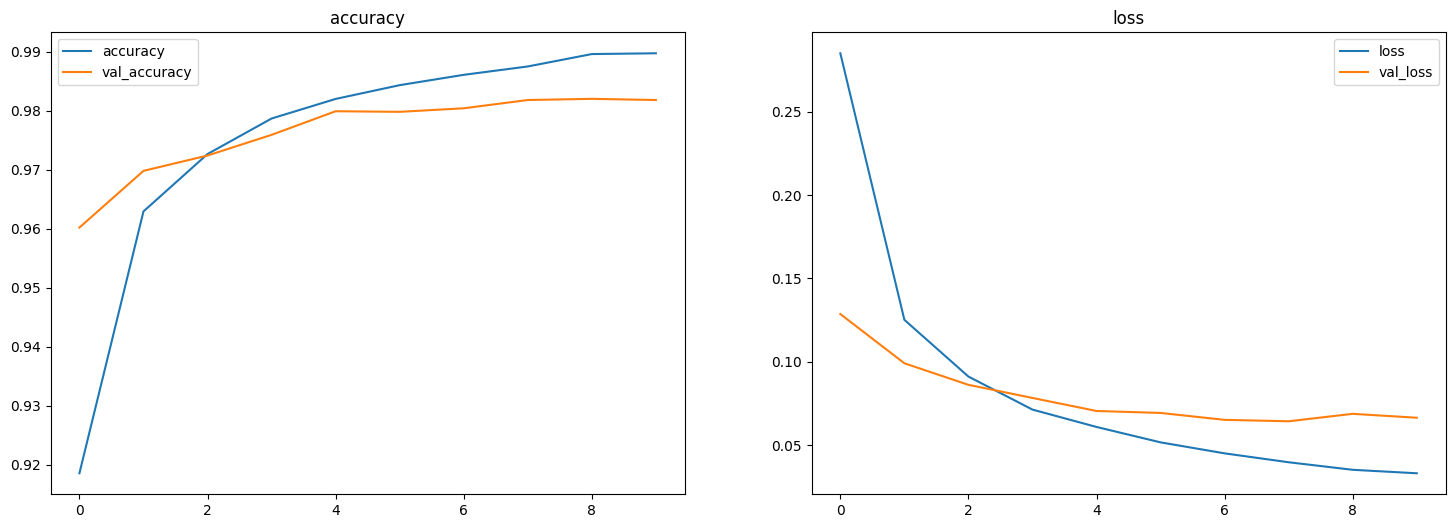

In [17]:
# accuracy와 loss 확인
plt. figure(figsize=(18, 6))

# 정확도
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy')
plt.legend()

# 손실률
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('loss')
plt.legend()

plt.show()

In [ ]:
############################################################################

### CheckPoint

CheckPoint (체크포인트)
- 모델 학습 과정 중 특정 시점의 모델의 가중치와 파라미터를 저장한 상태
- 학습 중인 모델의 진행 상황을 특정 지점에서 보존하는 데 사용
- ModelCheckpoint('best-model.keras')
  - 최상의 검증 점수를 낸 모델을 파일로 저장(베스트 파라미터 모델과 같은 개념)
  - model = keras.models.load_model('best-model.keras')
  - 이후 이 model 사용 

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint

tf.random.set_seed(3)

# (1) 모델 설정
# 2개의 층으로 구성된 모델 
# 첫 번째 층 : 입력 : 28*28=784, 출력 : 512
# 두 번째 층 : (입력 512), 출력 : 10
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dropout((0.3))) # 드롭아웃
model.add(Dense(10, activation='softmax'))

# (2) 컴파일
# 레이블 인코딩 안하고 정수 그대로 쓸거니까 sparse_categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='rmsprop', metrics=['accuracy'])

# CheckPoint 설정
check_pointer = ModelCheckpoint('best_model.keras')



# Early Stopping적용
# patience : 개선이 안되더라도 바로 종료시키지 않고, 2개 더 에포크 진행
early_stopping_callback = EarlyStopping(patience=2, restore_best_weights=True)

# (3) 모델 학습 (실행)
epochs = 100
batch_size = 128

history4 = model.fit(X_train2, y_train, 
                    epochs=epochs, batch_size=batch_size,
                    validation_data=(X_test2, y_test),
                    callbacks=[check_pointer, early_stopping_callback])  # callback에 체크포인트도


# (4) 모델 평가 (결과 출력)
loss, accuracy = model.evaluate(X_test2, y_test)

print(f'정확도: {accuracy:.4f}, 손실: {loss:.4f}')


Epoch 1/100
469/469 [==============================] - 4s 7ms/step - loss: 0.2851 - accuracy: 0.9168 - val_loss: 0.1313 - val_accuracy: 0.9610
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1275 - accuracy: 0.9616 - val_loss: 0.0941 - val_accuracy: 0.9714
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0918 - accuracy: 0.9729 - val_loss: 0.0923 - val_accuracy: 0.9723
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0734 - accuracy: 0.9779 - val_loss: 0.0742 - val_accuracy: 0.9769
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0619 - accuracy: 0.9814 - val_loss: 0.0741 - val_accuracy: 0.9776
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0524 - accuracy: 0.9844 - val_loss: 0.0678 - val_accuracy: 0.9787
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0462 - accuracy: 0.9856 - val_loss: 0.0667 - val_accuracy: 0.9808

In [21]:
# 저장된 베스트 모델 불러오기
from tensorflow.keras.models import load_model

best_model = load_model('best_model.keras')

In [22]:
best_model.evaluate(X_test2, y_test)

313/313 [==============================] - 0s 960us/step - loss: 0.0719 - accuracy: 0.9809


[0.07190894335508347, 0.98089998960495]